# feature selection - LR를 통한 LASSO

In [119]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [62]:
dataset = pd.read_csv(r'..\..\..\Code\SH\1. 데이터생성\최종\merge+7.6.2_.csv')
#EVITDA NAN 많아 변별력이 떨어져 제외
drop_arr = ['EBITDA이자보상비율', 'EBITDA유동부채비율', 'EBITDA단기차입비율','EBITDA총자산비율', 'EBITDA총부채비율', '영업이익대비EBITDA비율','EBITDA_매출액', 'Unnamed: 0']

dataset.drop(drop_arr, axis=1, inplace=True)

In [63]:
X = dataset[dataset.columns[5:-18]]
y = dataset['부도']

In [64]:
lgr = LogisticRegression(C=0.001, penalty="l1", dual=False, solver='liblinear').fit(X, y)
model = SelectFromModel(lgr, prefit=True)

x_new = model.transform(X)

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [65]:
coef_arr = []
for i in range(55):
    coef_arr.append(float(lgr.coef_[:,i]))

In [66]:
subset = pd.DataFrame({'feature_name': lgr.feature_names_in_.tolist(), 'coef': coef_arr})
subset['rank'] = abs(subset['coef']).rank(ascending=False)
subset = subset.sort_values(by='rank')
subset['category'] = 0

In [67]:
def get_category(arr,name):
    for i in arr:
        try:
            subset.loc[subset['feature_name'] == i, 'category'] = name
        except:
            pass

    return subset

In [68]:
stability = ['유동비율', '당좌비율','유동부채비율','비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율', '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율']
income = ['자기자본순이익률', 
'총자본순이익률', 
'자기자본영업이익률', 
'총자본영업이익률', 
'경영자본순이익률', 
'경영자본영업이익률',
'매출액순이익률', 
'금융비용부담률', 
'매출액영업이익률',  
'이자보상비율', 
'매출액판관비율', 
'매출원가율']

activity = ['당좌자산회전률', 
'재고자산회전률', 
'자기자본회전률', 
'경영자본회전률', 
'비유동자산회전률', 
'매출채권회전률', 
'매입채무회전률', 
'유형자산회전율']

cashflow = ['EBITDA_매출액', 
'재고자산보유기간', 
'매출채권회수기간', 
'매입채무지급기간', 'EBITDA이자보상비율',
'EBITDA유동부채비율', 'EBITDA단기차입비율', 'EBITDA총자산비율', 'EBITDA총부채비율', 
'영업이익대비영업현금흐름비율', 
'영업이익대비EBITDA비율']

growth = ['자기자본증가율', 
'매출액증가율', 
'영업이익증가율', 
'순이익증가율', 
'유형자산증가율', 
'유동자산증가율']

productivity = ['부가가치율', 
'설비투자효율', 
'총자본투자효율']

In [69]:
catarr = [stability, income, activity, cashflow, growth, productivity]
name = ['안정성','수익성','활동성','현금흐름','성장성','생산성']
k = 0
for i in catarr:
    get_category(i,name[k])
    k+=1
    print(k)

1
2
3
4
5
6


In [85]:
subset = subset.loc[subset['rank'] <= 40]
subset.loc[subset['feature_name'] == '자기자본배율','category'] = '안정성'
a=subset.sort_values('rank')
a

,feature_name,coef,rank,category
38,경영자산비율,-2.949553e-02,1.0,안정성
10,총자본순이익률,-5.627458e-03,2.0,수익성
48,자기자본배율,-5.120671e-03,3.0,안정성
4,순운전자본비율,-2.145506e-03,4.0,안정성
27,총자본투자효율,-1.844081e-03,5.0,생산성
14,경영자본영업이익률,-1.562506e-03,6.0,수익성
34,부채구성비율,-1.375523e-03,7.0,안정성
29,매출액증가율,-1.213433e-03,8.0,성장성
11,자기자본영업이익률,-1.153662e-03,9.0,수익성
0,유동비율,-1.002049e-03,10.0,안정성


In [71]:
a=subset.sort_values('rank')

In [72]:
print('최종변수개수 : ',len(a['feature_name'].tolist()))
print('최종변수리스트 : ', a['feature_name'].tolist())

최종변수개수 :  38
최종변수리스트 :  ['경영자산비율', '총자본순이익률', '자기자본배율', '순운전자본비율', '총자본투자효율', '경영자본영업이익률', '부채구성비율', '매출액증가율', '자기자본영업이익률', '유동비율', '유형자산회전율', '비유동비율', '부채비율', '매출채권회수기간', '영업이익증가율', '매출액판관비율', '자기자본순이익률', '총자본영업이익률', '매출원가율', '매출채권회전률', '유동부채비율', '재고자산보유기간', '유동자산증가율', '재고자산회전률', '이익잉여금비율', '자기자본증가율', '부가가치율', '경영자본순이익률', '당좌비율', '매입채무회전률', '순이익증가율', '청산가치율', '매출액순이익률', '비유동장기적합률', '유형자산증가율', '매출채권_대_매입채무비율', '이자보상비율', '설비투자효율']


In [73]:
subset = subset.sort_values(by='category', ascending=False)

In [74]:
cate_list = subset['category'].unique()

In [75]:
subset.loc[subset['category'] == cate_list[0]].sort_values(by='rank')

,feature_name,coef,rank,category
25,유형자산회전율,-0.000995,11.0,활동성
23,매출채권회전률,-0.000172,20.0,활동성
19,재고자산회전률,-0.000077,24.0,활동성
24,매입채무회전률,-0.000043,30.0,활동성


In [76]:
subset.loc[subset['category'] == cate_list[1]].sort_values(by='rank').reset_index(drop=True)

,feature_name,coef,rank,category
0,매출채권회수기간,0.000397,14.0,현금흐름
1,재고자산보유기간,-0.000163,22.0,현금흐름


In [77]:
subset.loc[subset['category'] == cate_list[2]].sort_values(by='rank').reset_index(drop=True)

,feature_name,coef,rank,category
0,경영자산비율,-2.949553e-02,1.0,안정성
1,자기자본배율,-5.120671e-03,3.0,안정성
2,순운전자본비율,-2.145506e-03,4.0,안정성
3,부채구성비율,-1.375523e-03,7.0,안정성
4,유동비율,-1.002049e-03,10.0,안정성
5,비유동비율,-6.534921e-04,12.0,안정성
6,부채비율,4.449034e-04,13.0,안정성
7,유동부채비율,1.692629e-04,21.0,안정성
8,이익잉여금비율,7.561404e-05,25.0,안정성
9,당좌비율,4.492727e-05,29.0,안정성


In [78]:
subset.loc[subset['category'] == cate_list[3]].sort_values(by='rank').reset_index(drop=True)

,feature_name,coef,rank,category
0,총자본순이익률,-5.627458e-03,2.0,수익성
1,경영자본영업이익률,-1.562506e-03,6.0,수익성
2,자기자본영업이익률,-1.153662e-03,9.0,수익성
3,매출액판관비율,-2.946745e-04,16.0,수익성
4,자기자본순이익률,2.791067e-04,17.0,수익성
5,총자본영업이익률,-2.632918e-04,18.0,수익성
6,매출원가율,-2.167926e-04,19.0,수익성
7,경영자본순이익률,6.433304e-05,28.0,수익성
8,매출액순이익률,1.626965e-05,33.0,수익성
9,이자보상비율,9.567113e-07,37.0,수익성


In [79]:
subset.loc[subset['category'] == cate_list[4]].sort_values(by='rank').reset_index(drop=True)

,feature_name,coef,rank,category
0,매출액증가율,-0.001213,8.0,성장성
1,영업이익증가율,-0.000375,15.0,성장성
2,유동자산증가율,0.000081,23.0,성장성
3,자기자본증가율,0.000070,26.0,성장성
4,순이익증가율,0.000032,31.0,성장성
5,유형자산증가율,0.000004,35.0,성장성


In [80]:
subset.loc[subset['category'] == cate_list[5]].sort_values(by='rank').reset_index(drop=True)

,feature_name,coef,rank,category
0,총자본투자효율,-1.844081e-03,5.0,생산성
1,부가가치율,-6.754271e-05,27.0,생산성
2,설비투자효율,1.860783e-08,38.0,생산성


## 1차 SELECT 
1. 1~10위까지 10개
2. 수익성 안정성 현금흐름이 중요하다는 도메인 지식을 바탕으로<BR>
현금흐름 - 매출채권회수기간 & 성장성 - 영업이익증가율 2개 포함 
3. 총 12개<BR>
'경영자산비율', '총자본순이익률', '자기자본배율', '순운전자본비율', '총자본투자효율', '경영자본영업이익률', '부채구성비율', '매출액증가율', '자기자본영업이익률', '유형자산회전율','재고자산보유기간', '영업이익증가율'

In [81]:
print('최종변수개수 : ',len(a['feature_name'].tolist()))
print('최종변수리스트 : ', a['feature_name'].tolist())

최종변수개수 :  38
최종변수리스트 :  ['경영자산비율', '총자본순이익률', '자기자본배율', '순운전자본비율', '총자본투자효율', '경영자본영업이익률', '부채구성비율', '매출액증가율', '자기자본영업이익률', '유동비율', '유형자산회전율', '비유동비율', '부채비율', '매출채권회수기간', '영업이익증가율', '매출액판관비율', '자기자본순이익률', '총자본영업이익률', '매출원가율', '매출채권회전률', '유동부채비율', '재고자산보유기간', '유동자산증가율', '재고자산회전률', '이익잉여금비율', '자기자본증가율', '부가가치율', '경영자본순이익률', '당좌비율', '매입채무회전률', '순이익증가율', '청산가치율', '매출액순이익률', '비유동장기적합률', '유형자산증가율', '매출채권_대_매입채무비율', '이자보상비율', '설비투자효율']


In [126]:
col_1st = ['경영자산비율', '총자본순이익률', '자기자본배율', '순운전자본비율', '총자본투자효율', '경영자본영업이익률', 
           '부채구성비율', '매출액증가율', '자기자본영업이익률', '유형자산회전율','매출채권회수기간','영업이익증가율']

In [94]:
dataset[col_1st]

,경영자산비율,총자본순이익률,자기자본배율,순운전자본비율,총자본투자효율,경영자본영업이익률,부채구성비율,매출액증가율,자기자본영업이익률,유형자산회전율,재고자산보유기간,영업이익증가율
0,94.970680,0.53,179.37,22.76,8.76,1.42,55.519145,0.00,3.35,4.18,323.008850,0.00
1,97.661182,0.53,179.37,22.76,8.76,1.42,57.963459,0.00,3.35,4.18,323.008850,0.00
2,85.767158,-12.42,133.37,7.98,0.79,-21.36,57.574183,66.81,-49.82,7.64,155.319149,0.00
3,82.952183,0.83,131.30,35.58,16.80,-7.00,41.851216,-34.12,-14.10,9.25,166.666667,0.00
4,84.359915,-47.69,52.25,24.97,-37.94,-34.99,50.569608,-24.76,-63.12,23.38,152.083333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
26786,66.848630,2.77,4611.84,14.15,8.84,1.80,12.585769,-7.26,1.40,3.67,5.292923,108.43
26787,67.290269,2.60,4650.29,8.68,8.80,1.40,12.711483,8.12,1.08,4.10,6.190638,-22.03
26788,66.845730,3.06,4696.15,11.59,9.80,2.08,6.333271,6.87,1.56,4.40,4.658583,45.37
26789,69.011845,10.44,5133.42,21.47,18.02,0.92,7.960699,-9.35,0.68,4.14,5.335477,-54.16


C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:title={'center':'Correlation of Features'}>

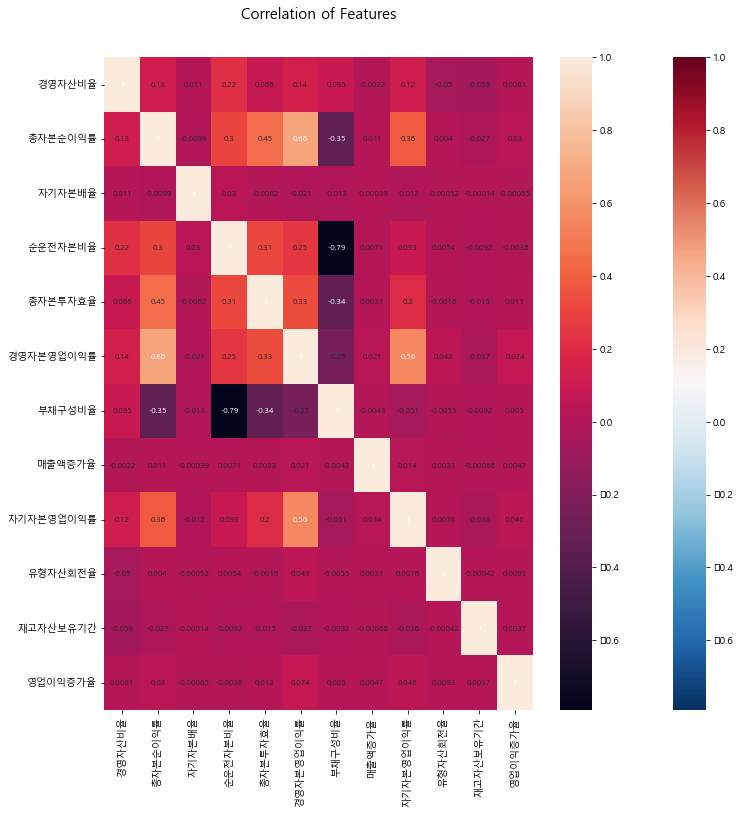

In [95]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

cor = dataset[col_1st].corr()
plt.rcParams['font.family'] = 'malgun gothic'
plt.rcParams['figure.figsize'] = (12, 12) #그림사이즈 지정
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(cor, cmap = 'RdBu_r', linecolor = "white", annot = True, annot_kws = {"size" : 8})

sns.heatmap(dataset[col_1st].corr())

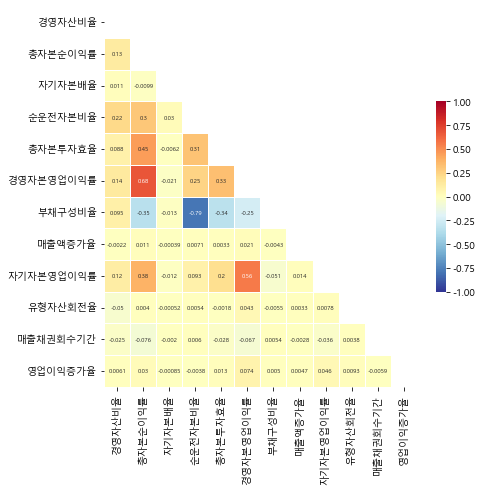

In [150]:
matplotlib.rcParams['axes.unicode_minus'] = False #-나오게하는 옵션
c = dataset[col_1st]
df = c.corr()
fig, ax = plt.subplots( figsize=(7,7))
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws = {'size' : 6},
           )  
plt.show()

In [128]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['변수명'] = dataset[col_1st].columns
vif['VIF'] = [variance_inflation_factor(dataset[col_1st].values, i) for i in range(dataset[col_1st].shape[1])]
vif


,변수명,VIF
0,경영자산비율,13.018306
1,총자본순이익률,2.156552
2,자기자본배율,1.002786
3,순운전자본비율,4.705226
4,총자본투자효율,1.349844
5,경영자본영업이익률,2.420291
6,부채구성비율,9.579873
7,매출액증가율,1.001016
8,자기자본영업이익률,1.499180
9,유형자산회전율,1.006825


## 2차 SELECT
순운전자본비율에서 상관도가 높게 나타나 안정성에서 다음 순위인 11 위 유동비율로 대체<BR>
훨씬 나아진 것을 확인 최종SET으로 확정<BR>
<BR>
12개<BR>'경영자산비율', '총자본순이익률', '자기자본배율', '유동비율', '총자본투자효율', '경영자본영업이익률', 
           '부채구성비율', '매출액증가율', '자기자본영업이익률', '유형자산회전율','재고자산보유기간','영업이익증가율'

In [129]:
col_finance = [
    '경영자산비율', '총자본순이익률', '자기자본배율', '유동비율', '총자본투자효율', '경영자본영업이익률', 
           '부채구성비율', '매출액증가율', '자기자본영업이익률', '유형자산회전율','매출채권회수기간','영업이익증가율']

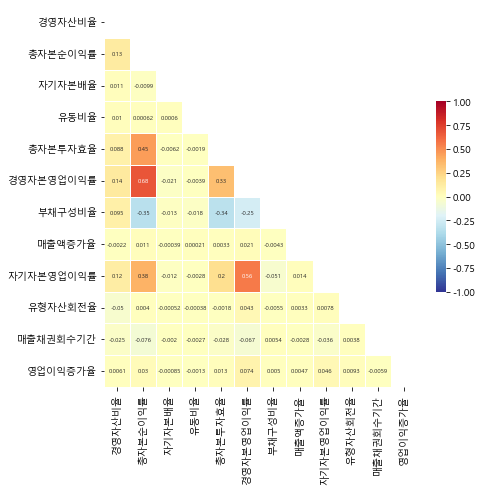

In [151]:
matplotlib.rcParams['axes.unicode_minus'] = False #-나오게하는 옵션
b = dataset[col_finance]
df = b.corr()
fig, ax = plt.subplots( figsize=(7,7))
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,# 컬러바 범위 -1 ~ 1
            annot_kws = {'size' : 6}
           ) 
plt.show()


In [131]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['변수명'] = dataset[col_finance].columns
vif['VIF'] = [variance_inflation_factor(dataset[col_finance].values, i) for i in range(dataset[col_finance].shape[1])]
vif


,변수명,VIF
0,경영자산비율,3.371400
1,총자본순이익률,2.147491
2,자기자본배율,1.001882
3,유동비율,1.001311
4,총자본투자효율,1.348114
5,경영자본영업이익률,2.419558
6,부채구성비율,3.294886
7,매출액증가율,1.000944
8,자기자본영업이익률,1.497833
9,유형자산회전율,1.005591


In [132]:
dataset.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '유동비율', '당좌비율', '유동부채비율',
       '비유동비율', '순운전자본비율', '부채비율', '차입금의존도', '비유동장기적합률', '매출채권_대_매입채무비율',
       '자기자본순이익률', '총자본순이익률', '자기자본영업이익률', '총자본영업이익률', '경영자본순이익률', '경영자본영업이익률',
       '매출액순이익률', '금융비용부담률', '매출액영업이익률', '당좌자산회전률', '재고자산회전률', '자기자본회전률',
       '경영자본회전률', '비유동자산회전률', '매출채권회전률', '매입채무회전률', '유형자산회전율', '설비투자효율',
       '총자본투자효율', '자기자본증가율', '매출액증가율', '영업이익증가율', '순이익증가율', '유형자산증가율',
       '유동자산증가율', '부채구성비율', '청산가치율', '이익잉여금비율', '자본잉여금비율', '경영자산비율', '이자보상비율',
       '매출액판관비율', '매출원가율', '부가가치율', '재고자산보유기간', '매출채권회수기간', '매입채무지급기간',
       '자기자본배당률', '금융비용_대_부채비율', '자기자본배율', '총자산영업이익률', '총자산회전율', 'log총자산',
       'log총자산회전률', '자본/부채', '이익잉여금/총자산', 'key', '종가변동률', '정기공시제목', '수시공시제목',
       '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자',
       '출자목적_경영권', '출자목적_영업이익', '기타', '부도', '신종채권_운영', '신종채권_시설', '신종채권_기타'],
      dtype='object')

In [133]:
col_head = ['회사명', '거래소코드', '회계년도']
col_finance = ['경영자산비율', '총자본순이익률', '자기자본배율', '유동비율', '총자본투자효율', '경영자본영업이익률', 
           '부채구성비율', '매출액증가율', '자기자본영업이익률', '유형자산회전율','매출채권회수기간','영업이익증가율']
col_text = [ '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단', '출자목적_투자',
       '출자목적_경영권', '출자목적_영업이익', '기타', '신종채권_운영', '신종채권_시설', '신종채권_기타', '종가변동률']
col_tail = ['key', '부도']

In [134]:
pd.concat([dataset[col_head],dataset[col_finance],dataset[col_text],dataset[col_tail]], axis = 1).to_csv('finalset.csv')